<a href="https://colab.research.google.com/github/aishwaryakham/Linear_regression_salary_dataset/blob/main/salary_dataset_simple__linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**salary_dataset using simple linear regression**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('/content/Salary_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [ ]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#check duplicate
df.duplicated().sum()


0

In [ ]:
#drop not use column
df = df.drop(df.columns[0], axis=1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


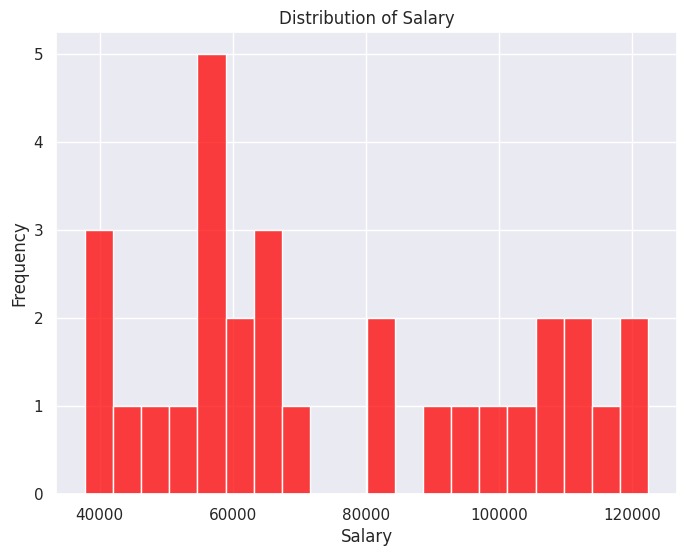

In [ ]:
#Visualizing Data Distributions
plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], bins=20, color='red')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()


In [ ]:
#show statistic
df.describe(include='all')


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['YearsExperience'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Salary'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['YearsExperience'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Salary'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['YearsExperience', 'Salary']]], **{})
chart

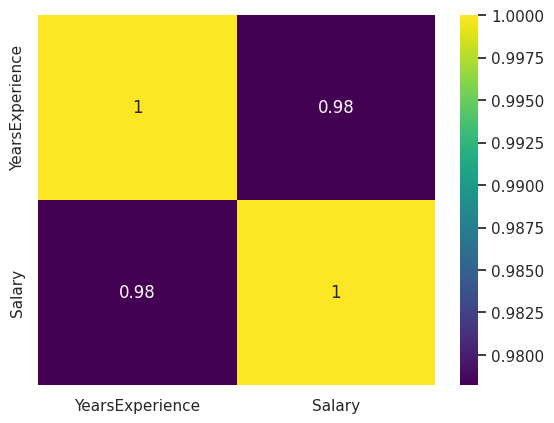

In [ ]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'viridis', annot= True);

In [ ]:
#declare features vector and target
x = df[['YearsExperience']]
y = df['Salary']

In [ ]:
#using sklearn for linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [ ]:
#making prediction
y_pred = reg.predict(x)

In [ ]:
print("R-squared:",reg.score(x, y).round(3))


R-squared: 0.957


In [ ]:
print("R-squared:",reg.score(x, y).round(6))


R-squared: 0.956957


In [ ]:
print("Coefficient:",reg.coef_[0].round(3))

Coefficient: 9449.962


In [ ]:
print("Intercept:",reg.intercept_.round(3))

Intercept: 24848.204


In [ ]:
#using module statmodel to show statistic
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
b, m = results.params

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        18:16:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     

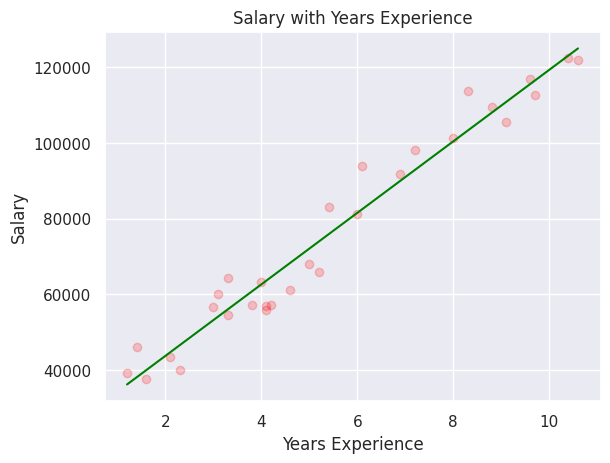

In [ ]:
#plot linear regression
plt.title("Salary with Years Experience")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.scatter(x, y, alpha = 0.2, color="red")
plt.plot(x, y_pred, color="green")
plt.show()

In [ ]:
df['Prediction'] = y_pred.round(1)
df['Residual'] = y - y_pred.round(1)
df['Difference%'] = (np.absolute(df['Residual'] / df['Salary'] * 100)).round(2)
df

,YearsExperience,Salary,Prediction,Residual,Difference%
0,1.2,39344.0,36188.2,3155.8,8.02
1,1.4,46206.0,38078.2,8127.8,17.59
2,1.6,37732.0,39968.1,-2236.1,5.93
3,2.1,43526.0,44693.1,-1167.1,2.68
4,2.3,39892.0,46583.1,-6691.1,16.77
5,3.0,56643.0,53198.1,3444.9,6.08
6,3.1,60151.0,54143.1,6007.9,9.99
7,3.3,54446.0,56033.1,-1587.1,2.91
8,3.3,64446.0,56033.1,8412.9,13.05
9,3.8,57190.0,60758.1,-3568.1,6.24


In [ ]:
df.describe()

,YearsExperience,Salary,Prediction,Residual,Difference%
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,5.413333,76004.000000,76003.996667,0.003333,7.047333
std,2.837888,27414.429785,26817.931561,5687.626567,5.174505
min,1.200000,37732.000000,36188.200000,-7958.000000,0.230000
25%,3.300000,56721.750000,56033.100000,-4088.450000,2.605000
50%,4.800000,65238.000000,70208.000000,-459.900000,6.100000
75%,7.800000,100545.750000,98557.900000,3372.625000,11.755000
max,10.600000,122392.000000,125017.800000,11448.000000,17.590000
